In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

170498071/170498071 [==============================] - 14s 0us/step
(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

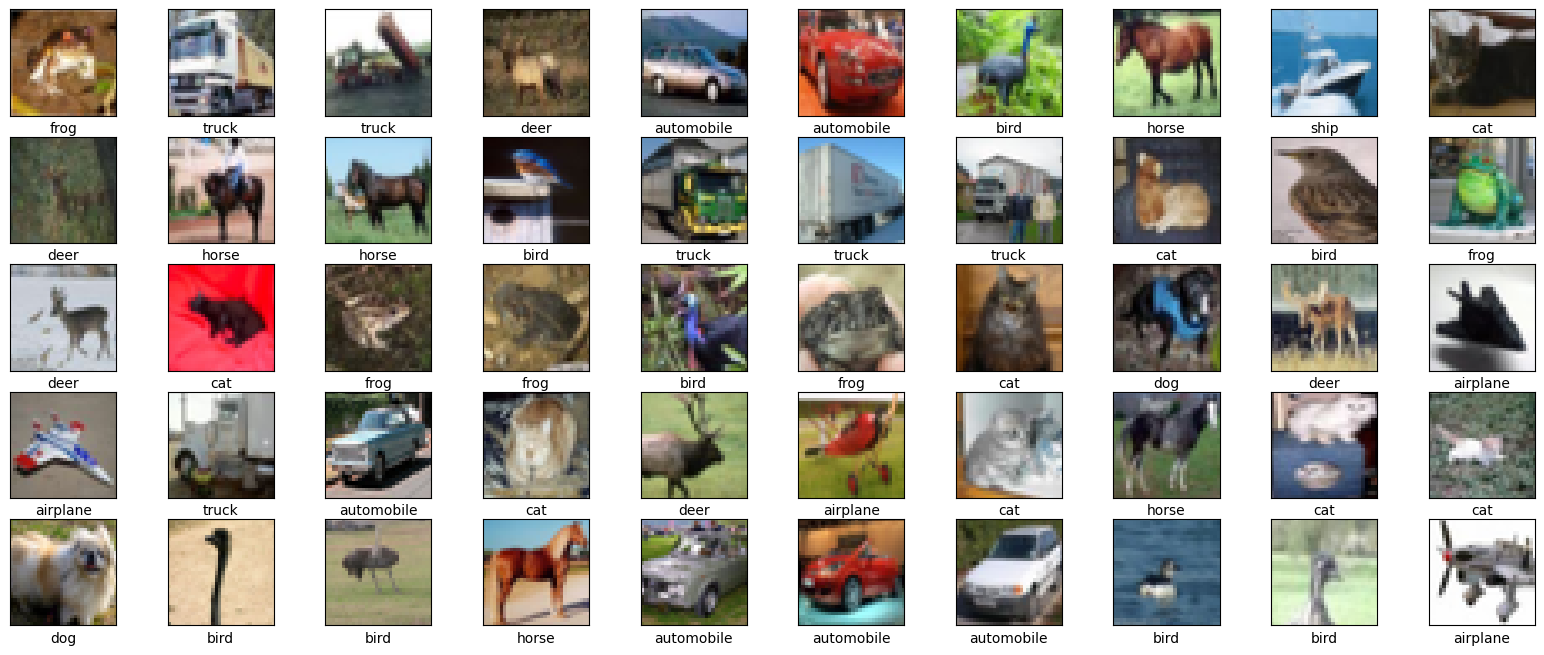

In [4]:
plt.figure(figsize=(20,8))
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.imshow(X_train[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(class_names[Y_train[i][0]])

plt.show()

In [5]:
X_train, X_test = X_train / 255.0, X_test / 255.0

In [6]:
model = keras.Sequential([

    keras.Input(shape=(32,32,3)),


    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),


    layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 64)          0

In [7]:
model.compile(
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [8]:
h = model.fit(x=X_train, y=Y_train, epochs=10, validation_split=0.2, batch_size=32)

Epoch 1/10
1250/1250 [==============================] - 21s 6ms/step - loss: 1.7266 - accuracy: 0.3666 - val_loss: 1.3995 - val_accuracy: 0.4954
Epoch 2/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.3155 - accuracy: 0.5326 - val_loss: 1.2672 - val_accuracy: 0.5568
Epoch 3/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.1410 - accuracy: 0.5995 - val_loss: 1.0971 - val_accuracy: 0.6139
Epoch 4/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.0187 - accuracy: 0.6433 - val_loss: 1.0240 - val_accuracy: 0.6472
Epoch 5/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.9327 - accuracy: 0.6760 - val_loss: 0.9938 - val_accuracy: 0.6591
Epoch 6/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.8607 - accuracy: 0.7003 - val_loss: 0.9926 - val_accuracy: 0.6648
Epoch 7/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.8040 - accuracy: 0.7224 - val_loss: 0.9434 - val_accuracy

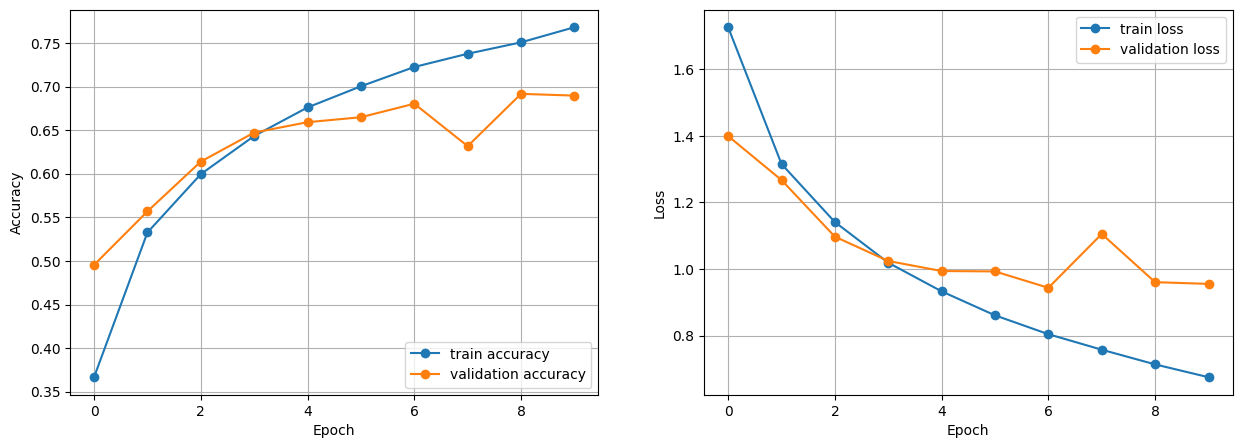

In [9]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [10]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 1s 3ms/step - loss: 0.9528 - accuracy: 0.6815

Test Accuracy: 0.6815000176429749

Test Loss: 0.9528133869171143


In [11]:
predictions = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [12]:
predictions[0]

array([1.0663028e-02, 2.7176848e-04, 1.0539030e-02, 5.1713431e-01,
       4.9202726e-03, 3.9499989e-01, 3.8213234e-02, 8.5937890e-04,
       2.1222338e-02, 1.1767356e-03], dtype=float32)

In [13]:
np.argmax(predictions[0])

3

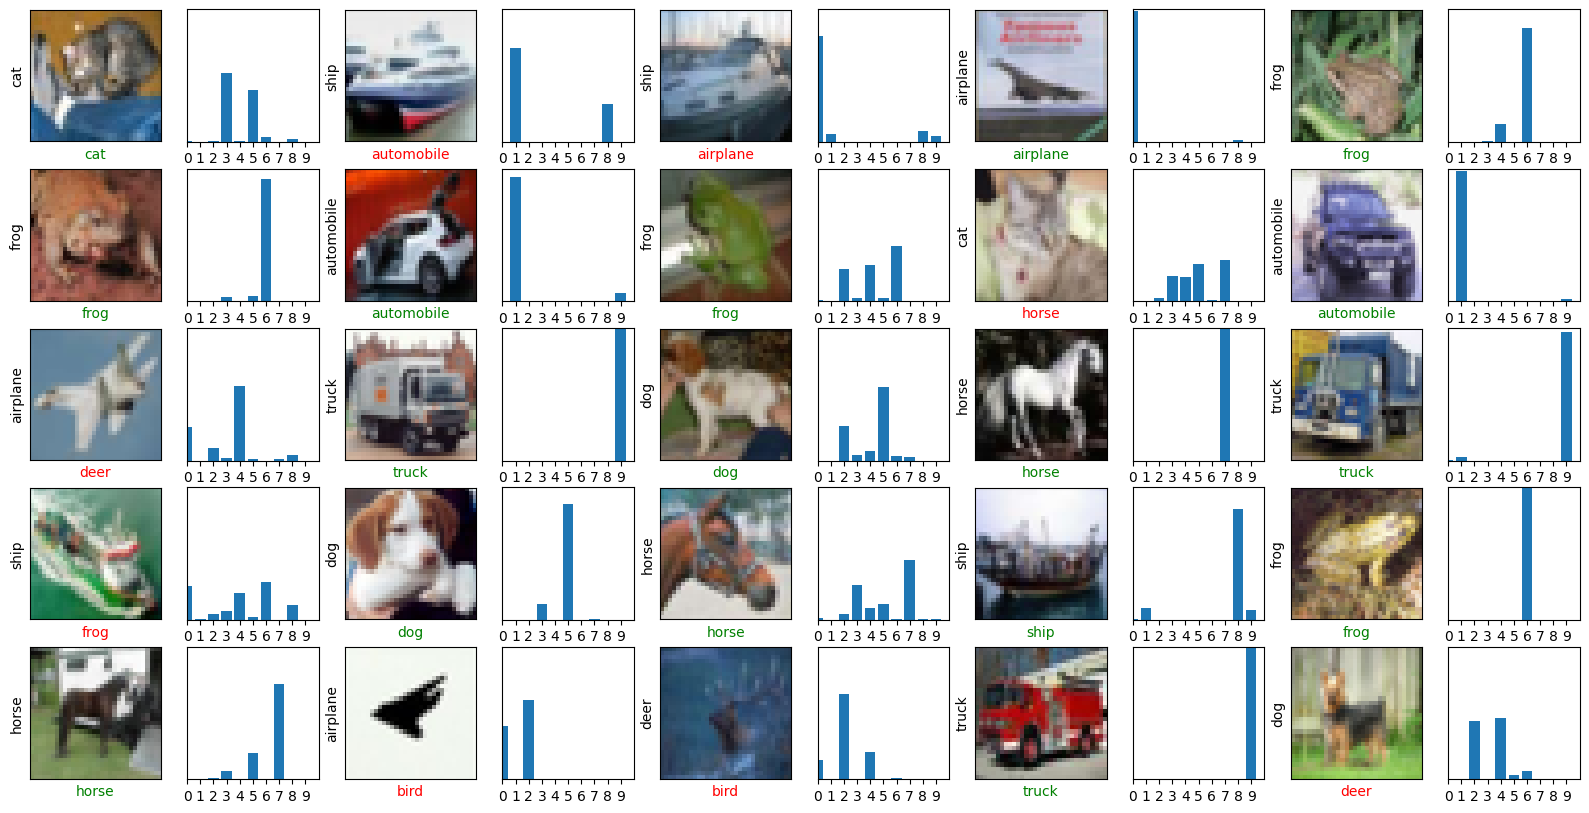

In [14]:
rows = 5
cols = 5

plt.figure(figsize=(20,10))
for i in range(25):

    plt.subplot(rows, 2*cols, 2*i+1)
    plt.imshow(X_test[i])
    plt.xticks([])
    plt.yticks([])
    plt.ylabel(class_names[Y_test[i][0]])
    if Y_test[i][0] == np.argmax(predictions[i]):
        plt.xlabel(class_names[np.argmax(predictions[i])], color='g')
    else:
        plt.xlabel(class_names[np.argmax(predictions[i])], color='r')


    plt.subplot(rows, 2*cols, 2*i+2)
    plt.bar(range(10), predictions[i])
    plt.yticks([])
    plt.xticks(range(0,10))
    plt.ylim([0,1])
    plt.xlim([0,10])

plt.show()

**RMSprop – Optimizer**

RMSprop serves as an adaptive optimization algorithm that adapts the learning rate for each parameter based on the square root of the exponential moving average of squared gradients.

Parameters

Learning Rate: RMSprop utilizes an adaptive learning rate comparable to Adam, adjusting it based on the historical gradients. Learning Rate Schedule: It can employ a fixed learning rate or incorporate learning rate decay. Momentum: RMSprop does not include momentum in its formulation; typically, it tracks the exponential moving average of squared gradients. Weight Decay: Similar to Adam and SGD,  RMSprop provides optional support for L2 regularization through weight decay.

In [15]:
model.compile(
    optimizer='RMSprop',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [16]:
h = model.fit(x=X_train, y=Y_train, epochs=10, validation_split=0.2, batch_size=32)

Epoch 1/10
1250/1250 [==============================] - 8s 5ms/step - loss: 0.6376 - accuracy: 0.7760 - val_loss: 0.9651 - val_accuracy: 0.7033
Epoch 2/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.6075 - accuracy: 0.7898 - val_loss: 1.0625 - val_accuracy: 0.6835
Epoch 3/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.5734 - accuracy: 0.8016 - val_loss: 0.9731 - val_accuracy: 0.6967
Epoch 4/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.5500 - accuracy: 0.8091 - val_loss: 1.2077 - val_accuracy: 0.6580
Epoch 5/10
1250/1250 [==============================] - 7s 6ms/step - loss: 0.5240 - accuracy: 0.8178 - val_loss: 1.1786 - val_accuracy: 0.6702
Epoch 6/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.5038 - accuracy: 0.8265 - val_loss: 1.2055 - val_accuracy: 0.6957
Epoch 7/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.4920 - accuracy: 0.8290 - val_loss: 1.1293 - val_accuracy:

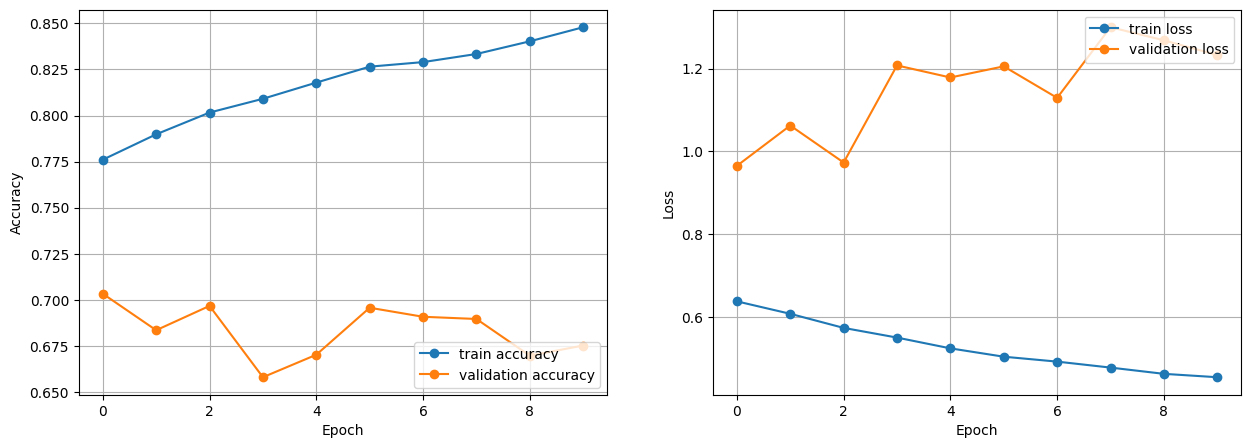

In [17]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [18]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 1s 3ms/step - loss: 1.2526 - accuracy: 0.6709

Test Accuracy: 0.6708999872207642

Test Loss: 1.2525519132614136


SGD - Optimizer

SGD, or Stochastic Gradient Descent, represents the fundamental optimization algorithm. It adjusts model parameters by utilizing the gradients of the loss function concerning each parameter, employing a constant learning rate.

Parameters

Learning Rate: SGD maintains a consistent learning rate for all parameters throughout the training process. Learning Rate Schedule: It lacks inherent adaptive learning rate schedules, but you can manually implement learning rate decay over time if needed. Momentum: SGD incorporates momentum, introducing an extra parameter to regulate the extent to which the previous gradient direction influences the current update. Weight Decay: Similar to Adam, SGD permits optional L2 regularization for weight decay.

In [19]:
model.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [20]:
h = model.fit(x=X_train, y=Y_train, epochs=10, validation_split=0.2, batch_size=32)

Epoch 1/10
1250/1250 [==============================] - 9s 6ms/step - loss: 0.4219 - accuracy: 0.8558 - val_loss: 1.3839 - val_accuracy: 0.6886
Epoch 2/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.3305 - accuracy: 0.8858 - val_loss: 1.3710 - val_accuracy: 0.6935
Epoch 3/10
1250/1250 [==============================] - 7s 5ms/step - loss: 0.2857 - accuracy: 0.8996 - val_loss: 1.3577 - val_accuracy: 0.6983
Epoch 4/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.2552 - accuracy: 0.9132 - val_loss: 1.4466 - val_accuracy: 0.6919
Epoch 5/10
1250/1250 [==============================] - 7s 5ms/step - loss: 0.2364 - accuracy: 0.9184 - val_loss: 1.5377 - val_accuracy: 0.6857
Epoch 6/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.2184 - accuracy: 0.9233 - val_loss: 1.5750 - val_accuracy: 0.6903
Epoch 7/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.2035 - accuracy: 0.9282 - val_loss: 1.6362 - val_accuracy:

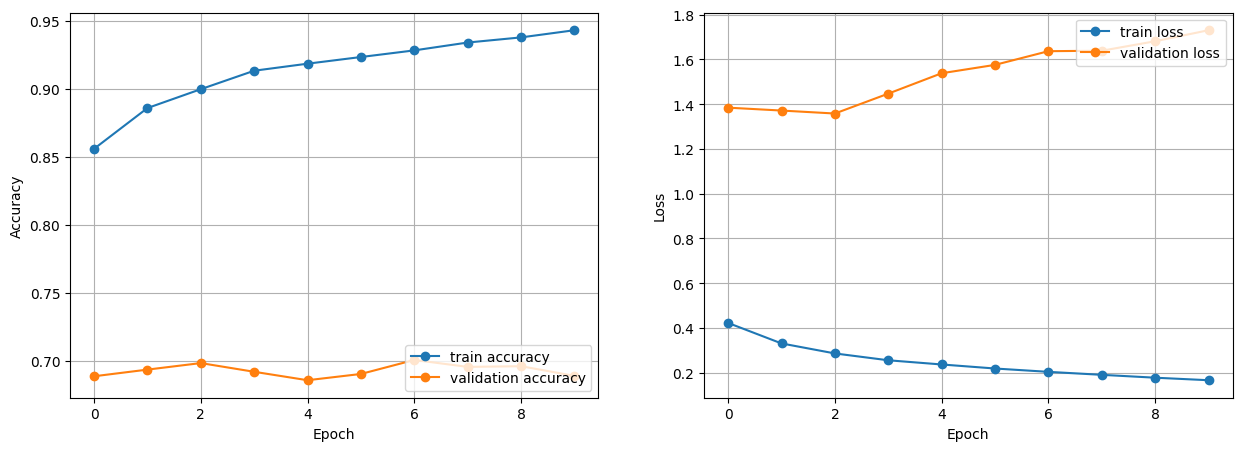

In [21]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [22]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 1s 4ms/step - loss: 1.7514 - accuracy: 0.6837

Test Accuracy: 0.6837000250816345

Test Loss: 1.7513562440872192


**Adam – Optimizer**

Adam stands out as a widely-used optimization algorithm that combines the advantages of both RMSprop and momentum-based techniques. It dynamically adjusts the learning rate for each parameter and employs exponential moving averages of gradients for weight updates.

Parameters
Learning Rate: Adam employs an adaptive learning rate, adjusting it individually for each parameter based on historical gradients. Learning Rate Schedule: It accommodates a time-based learning rate schedule or provides flexibility for customization. Momentum: Unlike traditional SGD, Adam doesn't use conventional momentum; instead, it calculates adaptive learning rates using the first and second moments. Weight Decay: Similar to RMSprop and SGD, Adam supports optional L2 regularization, imposing penalties on significant parameter values to mitigate overfitting.

In [23]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [24]:
h = model.fit(x=X_train, y=Y_train, epochs=10, validation_split=0.2, batch_size=32)

Epoch 1/10
1250/1250 [==============================] - 8s 5ms/step - loss: 0.3592 - accuracy: 0.8754 - val_loss: 1.5653 - val_accuracy: 0.6781
Epoch 2/10
1250/1250 [==============================] - 7s 6ms/step - loss: 0.3517 - accuracy: 0.8776 - val_loss: 1.4693 - val_accuracy: 0.6816
Epoch 3/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.3329 - accuracy: 0.8831 - val_loss: 1.5539 - val_accuracy: 0.6808
Epoch 4/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.3203 - accuracy: 0.8871 - val_loss: 1.4499 - val_accuracy: 0.6863
Epoch 5/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.3055 - accuracy: 0.8916 - val_loss: 1.4551 - val_accuracy: 0.6812
Epoch 6/10
1250/1250 [==============================] - 7s 5ms/step - loss: 0.2962 - accuracy: 0.8949 - val_loss: 1.5057 - val_accuracy: 0.6822
Epoch 7/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.2794 - accuracy: 0.9008 - val_loss: 1.5132 - val_accuracy:

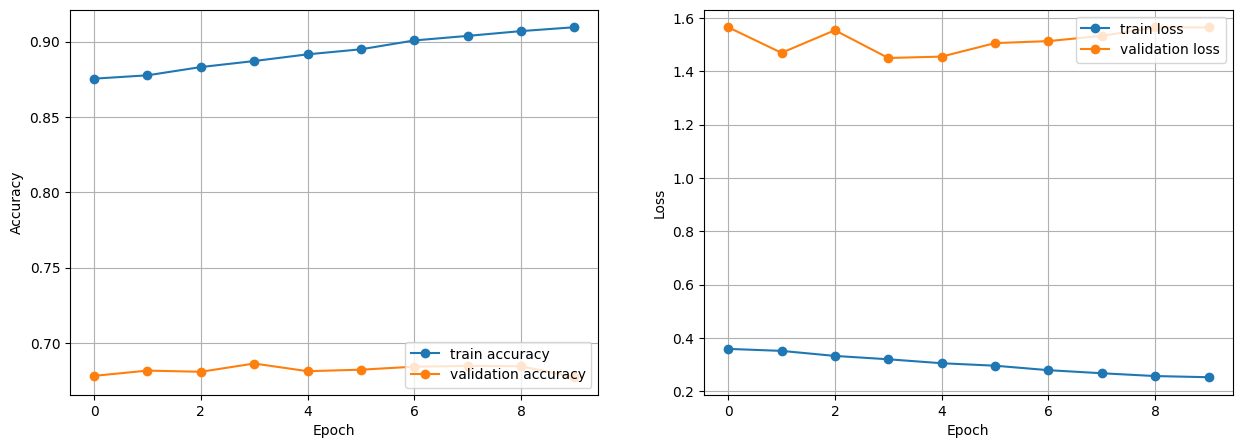

In [25]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [26]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 1s 3ms/step - loss: 1.5929 - accuracy: 0.6749

Test Accuracy: 0.6748999953269958

Test Loss: 1.5928988456726074
